# Covid-19 deaths and Vaccine analysis by Humberto Mundo

### The pandemic has changed our lives everywhere around the world. Since the creation of this notebook it's been almost 2 years since the virus hit and a year with the vaccine in play. We will analyze a dataset containing almost a year worths data of every country's vaccination, population and new reported deaths data. We will visualize the impact that vaccinations itself has on covid death rates.

Dataset: https://www.kaggle.com/sinakaraji/covid-vaccination-vs-death

### Table of contents:
1. [Import packages, data, and gather data info](#1.-Import-packages,-data,-and-gather-data-info)
2. [Organize data](#2.-Organize-data)
3. [EDA](#3.-EDA)
4. [Visualization](#4.-Visualization)
<br>

## 1. Import packages, data, and gather data info

In [ ]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd
import math
from scipy import stats
from scipy.stats import norm, skew, mode, pearsonr
from scipy.special import boxcox1p

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import precision_score,f1_score


import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('covid_vaccination_vs_death_ratio.csv')
data.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40146987.0,1.118086
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40146987.0,1.171547
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40146987.0,1.186557
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40146987.0,1.194042
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40146987.0,1.194545


In [4]:
data.describe()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,21916.000000,2.191600e+04,2.191600e+04,2.191600e+04,21916.000000,2.191600e+04,21916.000000
mean,10957.500000,1.949639e+07,1.238994e+07,7.218532e+06,102.513552,4.848158e+07,31.531167
std,6326.748586,6.835076e+07,4.590490e+07,2.432601e+07,332.678592,1.557119e+08,25.668999
min,0.000000,6.500000e+01,6.400000e+01,1.000000e+00,-41.000000,1.373000e+03,0.000724
25%,5478.750000,4.415168e+05,3.104125e+05,1.081108e+05,1.000000,2.871065e+06,7.848923
50%,10957.500000,2.570544e+06,1.674940e+06,8.143845e+05,9.000000,1.015771e+07,26.255923
75%,16436.250000,1.117111e+07,6.550948e+06,4.446461e+06,54.000000,3.817960e+07,53.202646
max,21915.000000,2.174043e+09,1.100842e+09,1.022207e+09,8786.000000,1.445862e+09,120.321681


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21916 entries, 0 to 21915
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               21916 non-null  int64  
 1   country                  21916 non-null  object 
 2   iso_code                 21916 non-null  object 
 3   date                     21916 non-null  object 
 4   total_vaccinations       21916 non-null  float64
 5   people_vaccinated        21916 non-null  float64
 6   people_fully_vaccinated  21916 non-null  float64
 7   New_deaths               21916 non-null  int64  
 8   population               21916 non-null  float64
 9   ratio                    21916 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.7+ MB


In [6]:
numerical_edited_data = data.drop(['Unnamed: 0','iso_code','country', 'date', 'ratio'], axis = 1)
numerical_edited_columns = numerical_edited_data.columns
for x in numerical_edited_columns:
    data[x] = data[x].astype('int64')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21916 entries, 0 to 21915
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               21916 non-null  int64  
 1   country                  21916 non-null  object 
 2   iso_code                 21916 non-null  object 
 3   date                     21916 non-null  object 
 4   total_vaccinations       21916 non-null  int64  
 5   people_vaccinated        21916 non-null  int64  
 6   people_fully_vaccinated  21916 non-null  int64  
 7   New_deaths               21916 non-null  int64  
 8   population               21916 non-null  int64  
 9   ratio                    21916 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 1.7+ MB


No NA values, 10 columns, 21916 rows.

## 2. Organize data

In [8]:
data.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502,448878,55624,12,40146987,1.118086
1,1,Afghanistan,AFG,2021-05-20,547901,470341,77560,10,40146987,1.171547
2,2,Afghanistan,AFG,2021-05-24,573277,476367,96910,10,40146987,1.186557
3,3,Afghanistan,AFG,2021-05-26,590454,479372,111082,19,40146987,1.194042
4,4,Afghanistan,AFG,2021-05-27,593313,479574,113739,14,40146987,1.194545


#### Drop outliers by using the ratio column

In [9]:
country_ratio_max = data['ratio'].groupby(data['country']).max().sort_values(ascending = False).reset_index()
country_ratio_max.head()

,country,ratio
0,Gibraltar,120.321681
1,Malta,96.646153
2,United Arab Emirates,95.887076
3,Portugal,88.716182
4,Cuba,86.658940


- Gibraltar is an outlier

In [10]:
data = data[data.country != 'Gibraltar']
data.head()

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502,448878,55624,12,40146987,1.118086
1,1,Afghanistan,AFG,2021-05-20,547901,470341,77560,10,40146987,1.171547
2,2,Afghanistan,AFG,2021-05-24,573277,476367,96910,10,40146987,1.186557
3,3,Afghanistan,AFG,2021-05-26,590454,479372,111082,19,40146987,1.194042
4,4,Afghanistan,AFG,2021-05-27,593313,479574,113739,14,40146987,1.194545


#### Add an unvaccinated column

In [11]:
data['people_unvaccinated'] = data['population'] - data['people_fully_vaccinated']
data = data[['country', 'date', 'total_vaccinations', 'people_vaccinated', 'people_unvaccinated',
             'people_fully_vaccinated', 'New_deaths', 'population', 'ratio']]
data['people_unvaccinated'] = data['people_unvaccinated'].astype('int64')

In [12]:
data.rename(columns={"New_deaths":"new_deaths", "total_vaccinations":"total_vaccinated"}, inplace = True)

#### Outliers in the unvaccinated column

In [13]:
data.head()

,country,date,total_vaccinated,people_vaccinated,people_unvaccinated,people_fully_vaccinated,new_deaths,population,ratio
0,Afghanistan,2021-05-11,504502,448878,40091363,55624,12,40146987,1.118086
1,Afghanistan,2021-05-20,547901,470341,40069427,77560,10,40146987,1.171547
2,Afghanistan,2021-05-24,573277,476367,40050077,96910,10,40146987,1.186557
3,Afghanistan,2021-05-26,590454,479372,40035905,111082,19,40146987,1.194042
4,Afghanistan,2021-05-27,593313,479574,40033248,113739,14,40146987,1.194545


How many countries does our dataset have?

In [14]:
data['country'].unique().shape

(198,)

### 3. EDA

In [15]:
data.head()

,country,date,total_vaccinated,people_vaccinated,people_unvaccinated,people_fully_vaccinated,new_deaths,population,ratio
0,Afghanistan,2021-05-11,504502,448878,40091363,55624,12,40146987,1.118086
1,Afghanistan,2021-05-20,547901,470341,40069427,77560,10,40146987,1.171547
2,Afghanistan,2021-05-24,573277,476367,40050077,96910,10,40146987,1.186557
3,Afghanistan,2021-05-26,590454,479372,40035905,111082,19,40146987,1.194042
4,Afghanistan,2021-05-27,593313,479574,40033248,113739,14,40146987,1.194545


#### Numerical variable test

In [16]:
numerical_data = data.drop(['country', 'date','new_deaths'], axis = 1)
num_variable = numerical_data.values
death_variable = data.loc[:,'new_deaths'].values

x1 = sm.add_constant(num_variable)
results = sm.OLS(death_variable,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1834.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:02:47   Log-Likelihood:            -1.5352e+05
No. Observations:               21765   AIC:                         3.070e+05
Df Residuals:                   21759   BIC:                         3.071e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.5347      3.773     18.694      0.000      63.139      77.930
x1         -1.777e-05   1.34e-06    -13.291      0.000   -2.04e-05   -1.52e-05
x2          1.372e-05   1.35e-06     10.171      0.000    1.11e-05    1.64e-05
x3         -9.456e+05   4.12e+06     -0.230      0.818   -9.02e+06    7.13e+06
x4         -9.456e+05   4.12e+06     -0.230      0.818   -9.02e+06    7.13e+06
x5          9.456e+05   4.12e+06      0.230      0.818   -7.13e+06    9.02e+06
x6            -0.9661      0.080    -12.021      0.000      -1.124      -0.809
==============================================================================
Omnibus:                    25323.342   Durbin-Watson:                   0.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8087810.142
Skew:                           5.719   Prob(JB):                         0.00
Kurtosis:                      96.742   Cond. No.                     8.67e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Normality test:

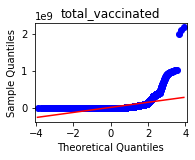

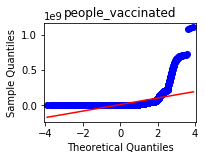

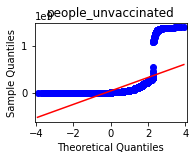

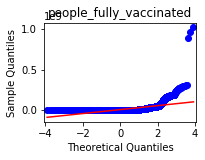

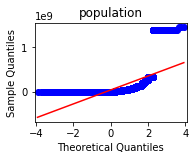

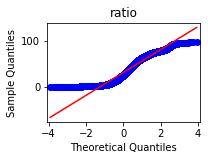

In [17]:
ndc = numerical_data.columns

for x in ndc:
    qqplot(numerical_data[x], line='s', ax = plt.subplot(222))
    plt.title(label=x)
    plt.show() 

Decent normality

#### Correlation heatmap

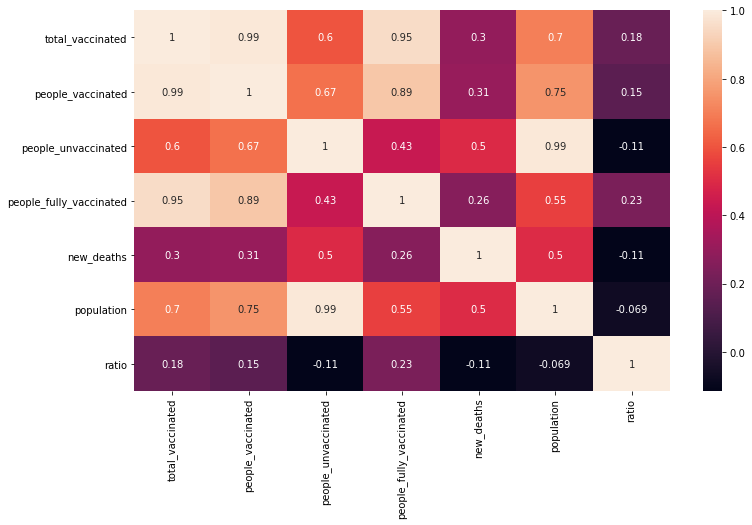

In [18]:
f,ax= plt.subplots(figsize=(12,7))
g = sns.heatmap(data.corr(),annot= True)
bottom, top = g.get_ylim()
g.set_ylim(bottom+.5, top-.5)
plt.show()

#### Correlation to new deaths

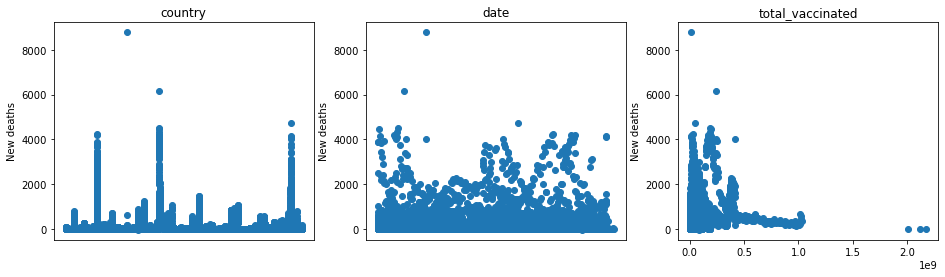

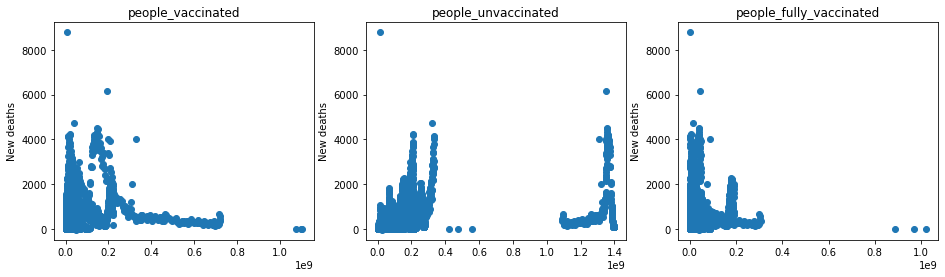

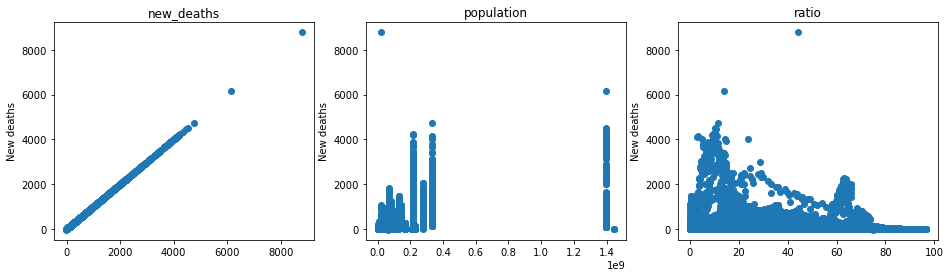

In [19]:
variables = data.columns
count = 0
for x in variables:
    plt.figure(count//3,figsize=(55,4))
    plt.subplot(1,10,np.mod(count,10)+1)
    plt.scatter(data[x], data.new_deaths)
    plt.title(label=x)
    plt.ylabel('New deaths')
    if x =='country' or x =='date':
        plt.xticks([])
    else:
        pass
    count += 1
plt.show() 

### 4. Visualization

#### Grouped by dataframes:

In [150]:
country_total_vaccinated = data.groupby('country').agg({'people_vaccinated': max}, dtype=np.int64).reset_index()
country_total_unvaccinated = data.groupby('country').agg({'people_unvaccinated': max}, dtype=np.int64).reset_index()
country_fully_vaccinated = data.groupby('country').agg({'people_fully_vaccinated': max}, dtype=np.int64).reset_index()

total_population = data['population'].unique().sum()
country_total_deaths = data[['country','new_deaths']].groupby('country', as_index=False).sum().sort_values(by = 'new_deaths', ascending = False)
country_total_ratio = data.groupby('country').agg({'ratio': max}, dtype=np.int64).sort_values(by = 'ratio', ascending = False).reset_index()
deaths_per_date = data.groupby('date').agg('sum').sort_values(by='date',ascending=True).reset_index()

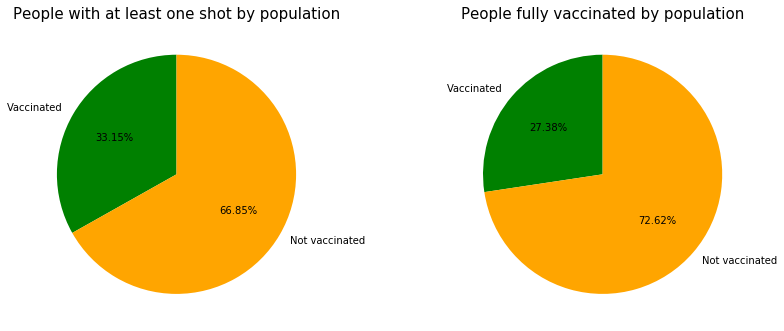

In [21]:
figure, ax = plt.subplots(1, 2, figsize=(14, 5.5))

ax[0].pie([country_total_vaccinated['people_vaccinated'].sum(), total_population],
           labels=['Vaccinated', 'Not vaccinated'],
           startangle = 90,
           colors = ['green','orange'],
           autopct='%1.2f%%')
ax[0].set_title('People with at least one shot by population', fontsize = 15)


ax[1].pie([country_fully_vaccinated['people_fully_vaccinated'].sum(), total_population],
           labels=['Vaccinated', 'Not vaccinated'],
           startangle = 90,
           colors = ['green','orange'],
           autopct='%1.2f%%')
ax[1].set_title('People fully vaccinated by population', fontsize = 15)


plt.show()

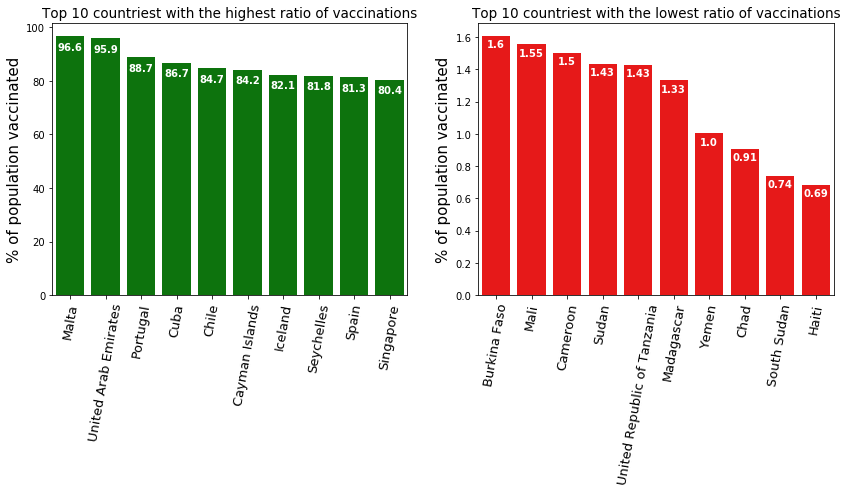

In [22]:
fig, ax = plt.subplots(figsize=(14,5),nrows=1, ncols=2)

sns.barplot(data = country_total_ratio.head(10), x = 'country' ,y = 'ratio'
            , color = 'green', saturation = .8 , ci = None, ax=ax[0])
ax[0].set_title('Top 10 countriest with the highest ratio of vaccinations', fontsize = 13.5)
ax[0].set_xlabel('')
ax[0].set_ylabel('% of population vaccinated',fontsize = 15)
ax[0].set_xticklabels(labels = country_total_ratio['country'].head(10),rotation=80, fontsize=13)
for i, v in enumerate(country_total_ratio['ratio'].head(10)):
    ax[0].text(x=i, y =v-5, s = round(v,1), color='white', fontweight='bold', ha='center')
    
    
sns.barplot(data = country_total_ratio.tail(10), x = 'country', y = 'ratio'
            , color = 'red', saturation = .8, ci = None, ax=ax[1])
ax[1].set_title('Top 10 countriest with the lowest ratio of vaccinations', fontsize = 13.5)
ax[1].set_xlabel('')
ax[1].set_ylabel('% of population vaccinated',fontsize = 15)
ax[1].set_xticklabels(labels = country_total_ratio['country'].tail(10),rotation=80, fontsize=13)
for i, v in enumerate(country_total_ratio['ratio'].tail(10)):
    ax[1].text(x=i, y =v-.07, s = round(v,2), color='white', fontweight='bold', ha='center')

plt.show()

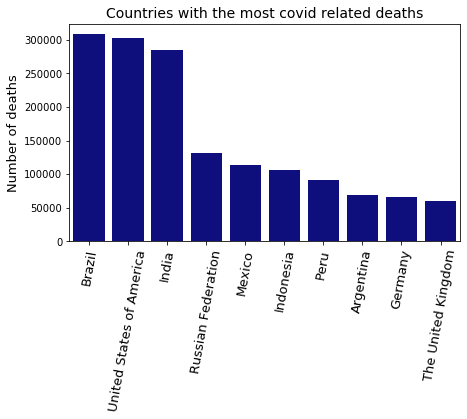

In [23]:
fig, ax = plt.subplots(figsize=(7,4))

sns.barplot(data = country_total_deaths.head(10), x = 'country' ,y = 'new_deaths'
            , color = 'darkblue', saturation = .8 , ci = None)
ax.set_title('Countries with the most covid related deaths', fontsize = 14)
ax.set_xlabel('')
ax.set_ylabel('Number of deaths',fontsize = 13)
ax.set_xticklabels(labels = country_total_deaths['country'].head(10), rotation=80, fontsize=13)

plt.show()

### Let's take a look at the total vaccination and death rates

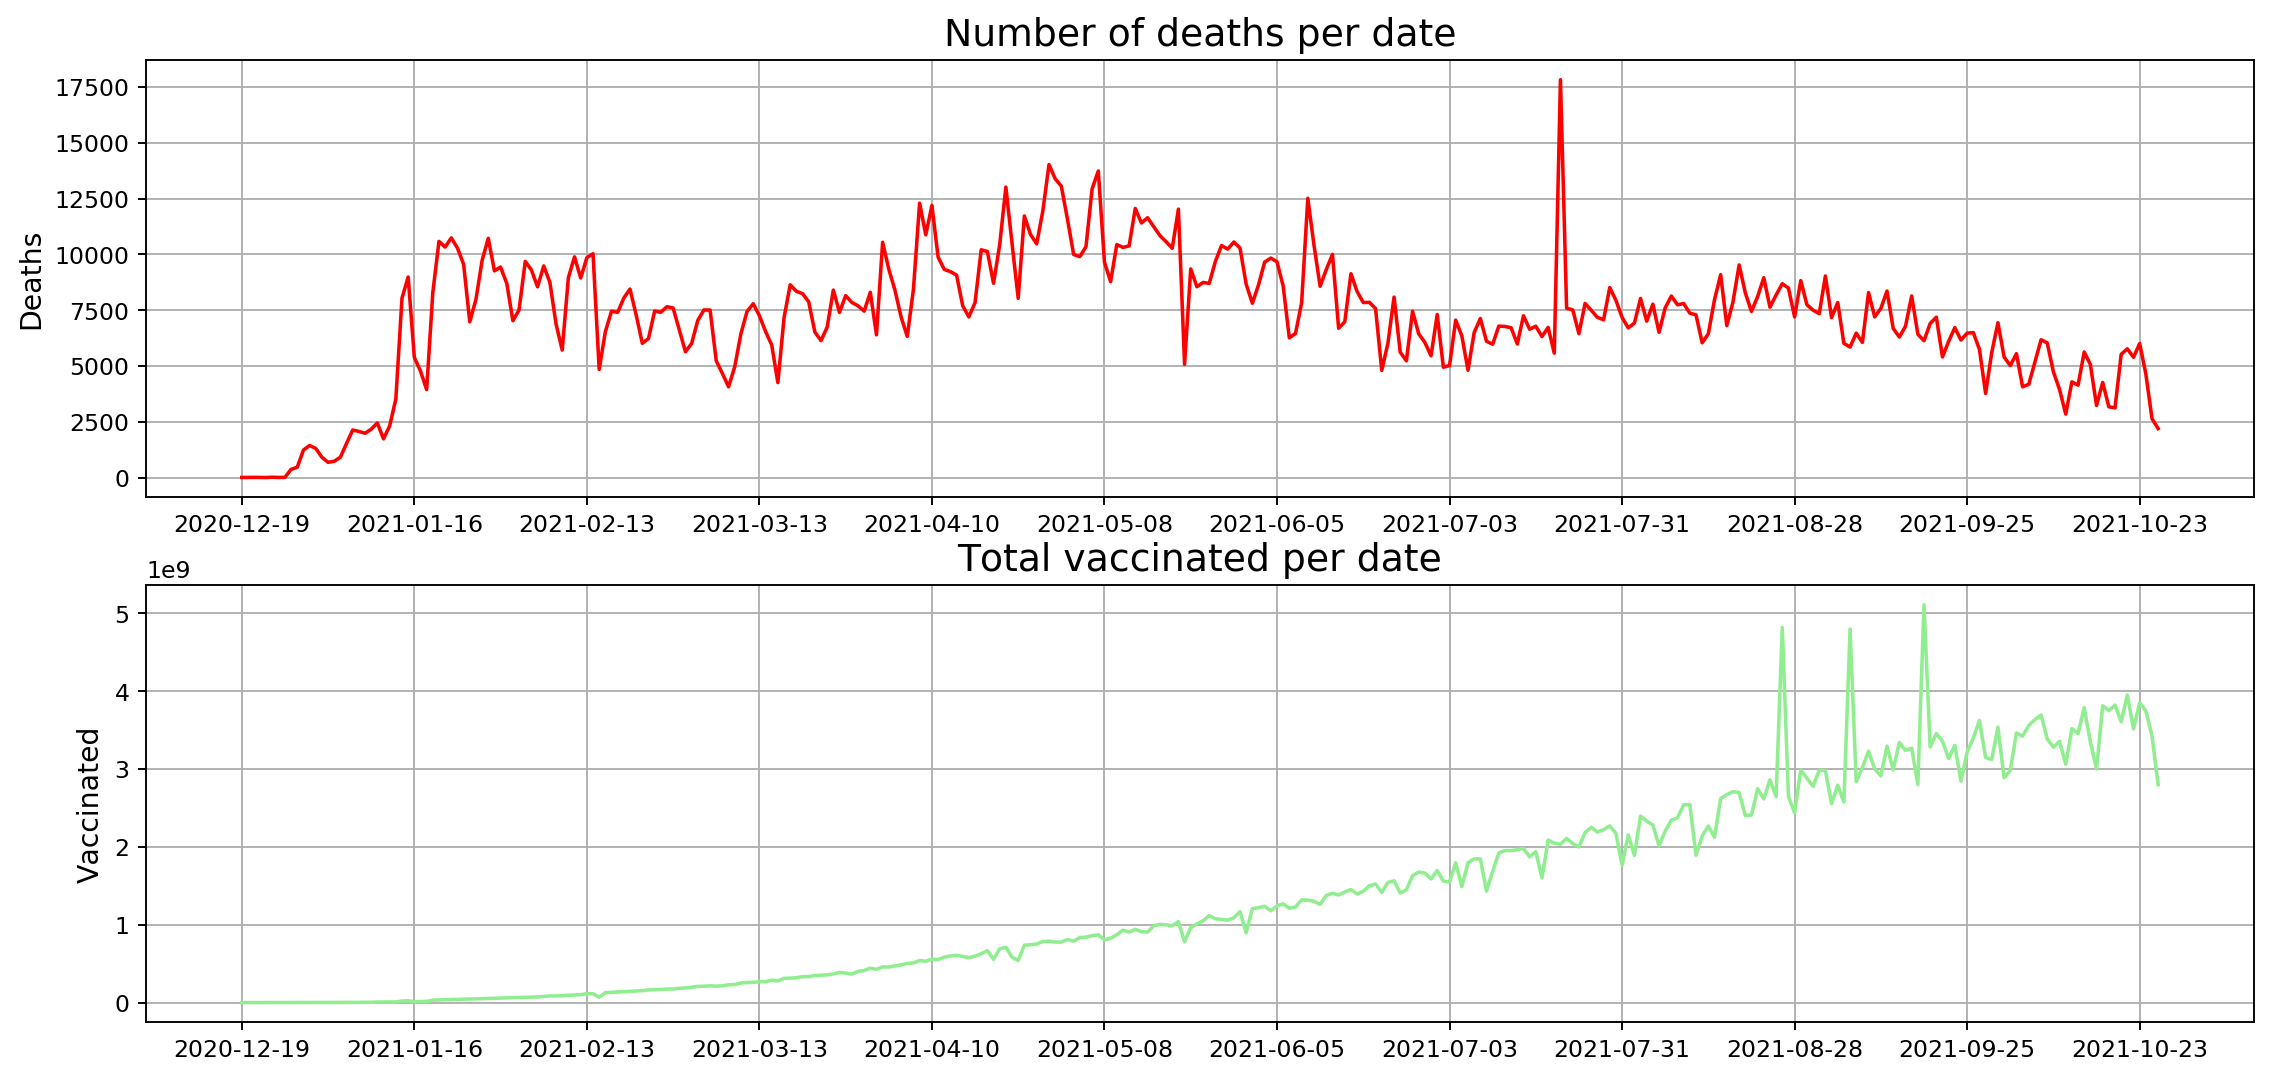

In [132]:
fig, ax = plt.subplots(2,1,figsize=(16,7.5), dpi= 170)
dates = deaths_per_date['date']
deaths = deaths_per_date['new_deaths']
vaccines = deaths_per_date['total_vaccinated']

#plot deaths per date
ax[0].plot(dates,deaths,color='red')
ax[0].set_title('Number of deaths per date', fontsize=16)
ax[0].set_xticks(np.arange(0,len(deaths_per_date['date']),28))
ax[0].set_ylabel('Deaths', fontsize=12)
ax[0].grid()

#plot vaccinations per date
ax[1].plot(dates,vaccines,color='lightgreen')
ax[1].set_title('Total vaccinated per date', fontsize=16)
ax[1].set_xticks(np.arange(0,len(deaths_per_date['date']),28))
ax[1].set_ylabel('Vaccinated', fontsize=12)
ax[1].grid()
plt.show()

### Combine both graphs into one plot and analyze

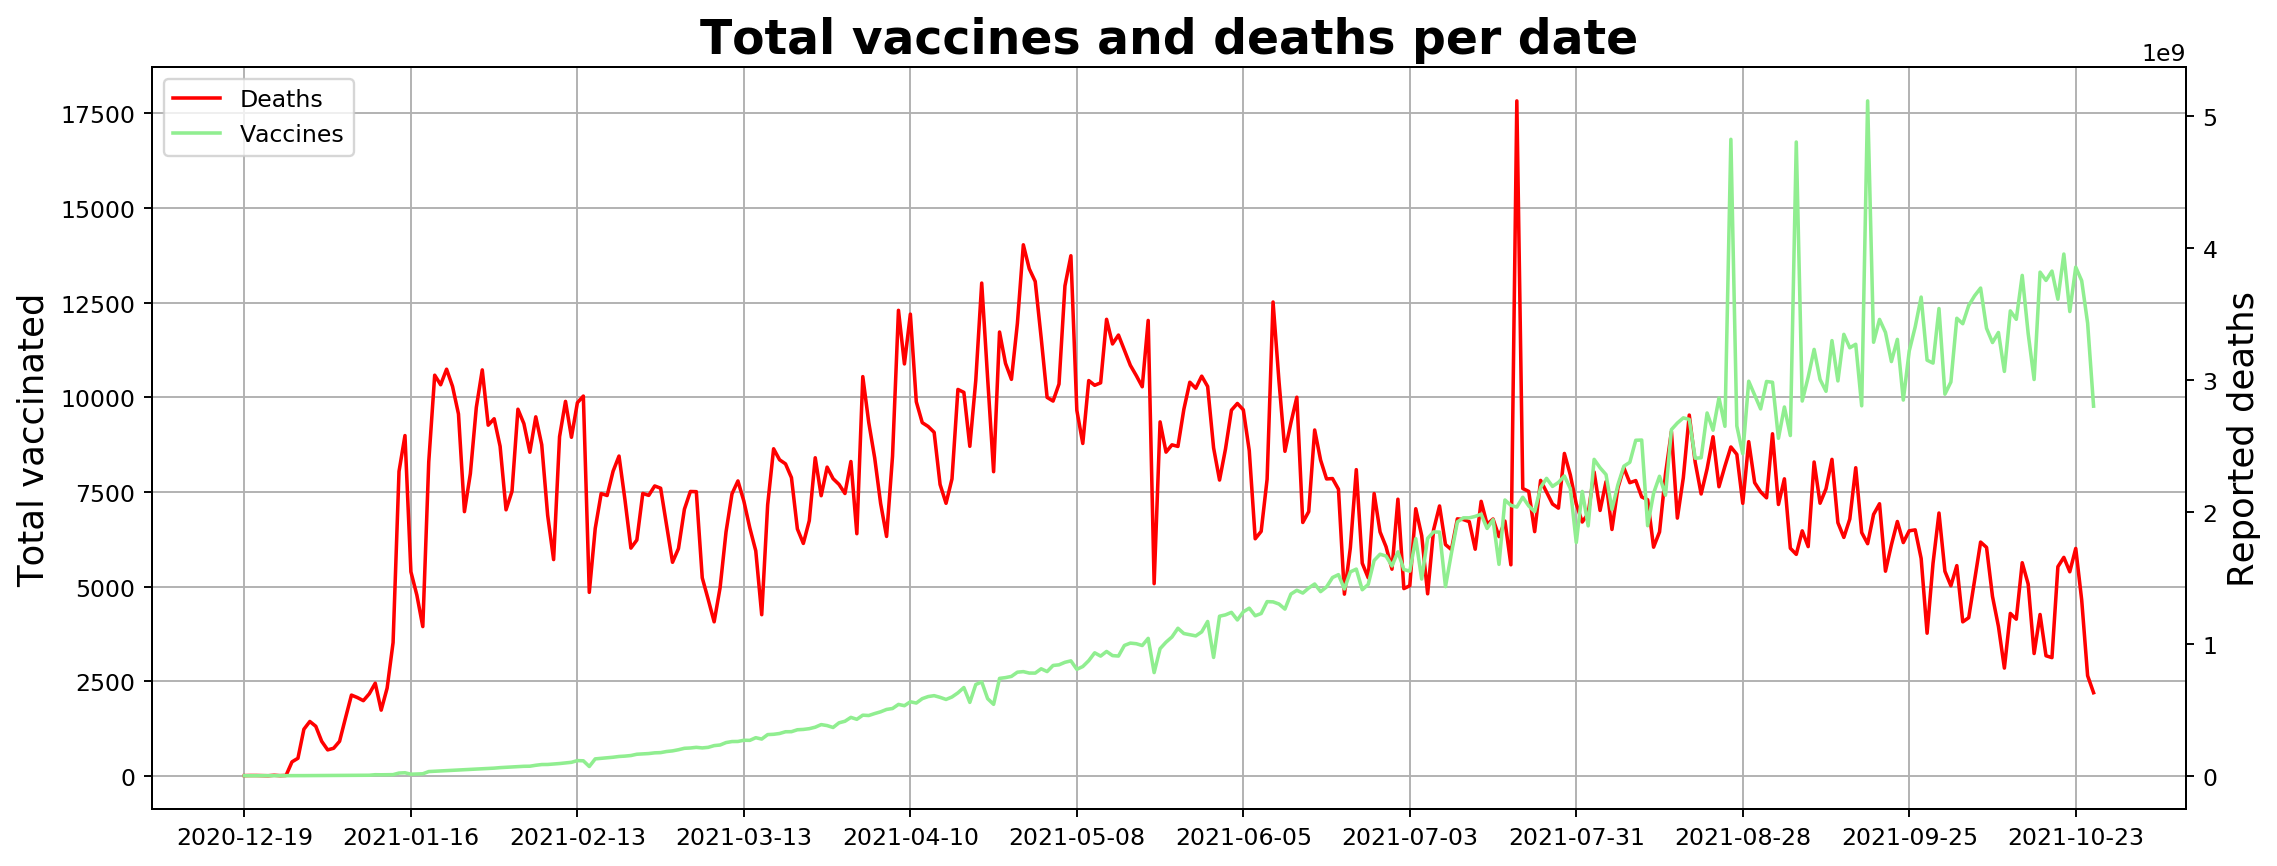

In [25]:
fig, ax = plt.subplots(1,1,figsize=(13.5,5.2), dpi= 170)

line1 = ax.plot(dates,deaths,color='red',label='deaths')#1st plot
ax.tick_params(axis='x',rotation=0,labelsize=10)
ax.set_title('Total vaccines and deaths per date', fontweight = 'bold', fontsize = 20)
ax.set_ylabel('Total vaccinated', fontsize=15)

ax2 = ax.twinx() #2nd plot
line2 = ax2.plot(dates,vaccines,color='lightgreen',label='vaccines')
ax2.set_xticks(np.arange(0,len(deaths_per_date['date']),28))
ax2.set_ylabel('Reported deaths', fontsize=15)


lns = line1+line2
fig.legend(lns, labels=['Deaths','Vaccines'], loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)
fig.tight_layout()
ax.grid()
plt.show()

##### Concluding the above chart: Starting from the end of 2020, the rate of people being vaccinated started off slow and didn't pick up until mid January of 2021. Covid related deaths hit a spike around the beginning of January, around the same time the vaccination line started to only slightly pick up. The rate of vaccinatons looks like it only gains momentum while the new deaths being reported hit a peak around the middle of July and then slowly died out. The 2 lines meet around the beginning of July and then as new deaths slow down, the vaccination rate keeps moving up. Towards the end of October both vaccination rates and new deaths trend downwards.

In [201]:
deaths_per_date_cumsum = data.groupby('date').agg('sum').cumsum().reset_index()
dates = deaths_per_date_cumsum['date']
deaths = deaths_per_date_cumsum['new_deaths']
one_shot = deaths_per_date_cumsum['people_vaccinated']
full_shot = deaths_per_date_cumsum['people_fully_vaccinated']

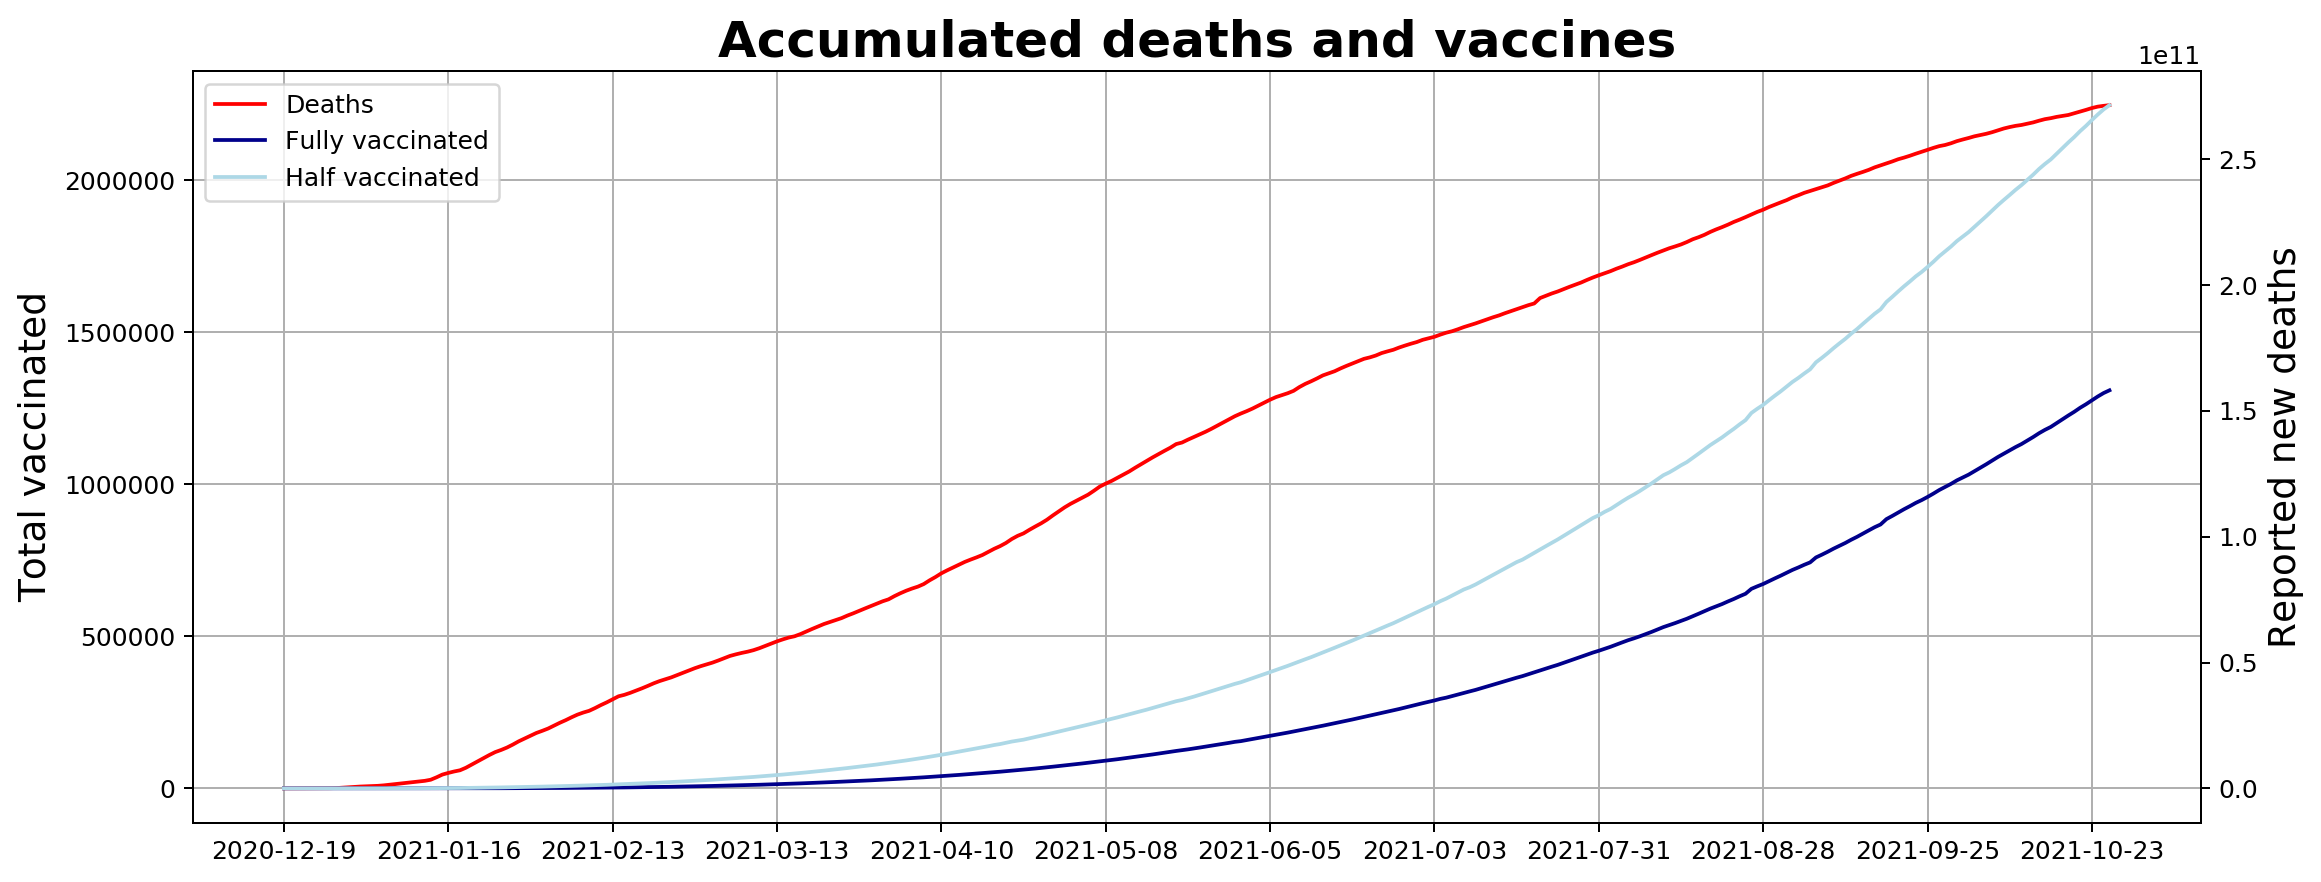

In [210]:
fig, ax = plt.subplots(1,1,figsize=(13,5), dpi= 180)

#1st line
line1 = ax.plot(dates,deaths,color='red',label='deaths')#1st plot
ax.tick_params(axis='x',rotation=0,labelsize=10)
ax.set_title('Accumulated deaths and vaccines', fontweight = 'bold', fontsize = 20)
ax.set_ylabel('Total vaccinated', fontsize=15)

ax2 = ax.twinx() #2nd line
line2 = ax2.plot(dates,full_shot,color='darkblue',label='vaccines')
ax2.set_xticks(np.arange(0,len(deaths_per_date['date']),28))
ax2.set_ylabel('Reported new deaths', fontsize=15)

#3rd line
line3 = ax2.plot(dates,one_shot,color='lightblue',label='vaccines')

lns = line1+line2+line3
fig.legend(lns, labels=['Deaths','Fully vaccinated','Half vaccinated'], loc='upper left',
           bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)
fig.tight_layout()
ax.grid()
plt.show()

##### Concluding the above chart: The total accumulated deaths seems to slow down as vaccinations pick up. The amount of poeple getting at least one shot is steadily picking up, we hope to see the rate of new deaths die down as vaccinations trend upwards.

### Scatter USA and UK death and vaccination percentages with a polynomial regression

In [135]:
usa_data = data.loc[data['country'] == 'United States of America'] 

X = usa_data.ratio.values.reshape(-1, 1)
Y = usa_data.new_deaths.values

#Linear
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

#Polynomial
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
poly_model = lin_reg_2.fit(x_poly,Y)

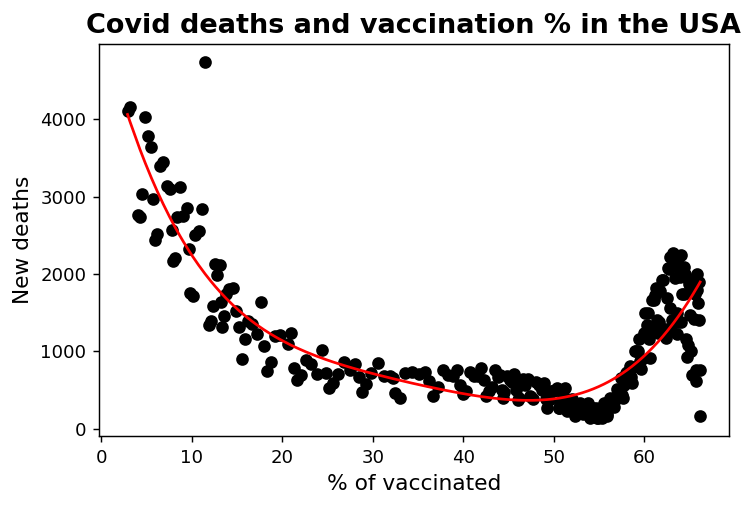

In [136]:
fig, ax = plt.subplots(1,1,figsize=(6,4), dpi= 130)
plt.scatter(usa_data.ratio , usa_data.new_deaths, color='black')
plt.plot(usa_data.ratio, lin_reg_2.predict(poly_reg.fit_transform(X)), color='red')
ax.set_title('Covid deaths and vaccination % in the USA', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('New deaths', fontsize=12)
ax.set_xlabel('% of vaccinated', fontsize=12)

fig.tight_layout()
plt.show()

In [137]:
uk_data = data.loc[data['country'] == 'The United Kingdom'] 

X = uk_data.ratio.values.reshape(-1, 1)
Y = uk_data.new_deaths.values

#Linear
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

#Polynomial
poly_reg = PolynomialFeatures(degree = 5)
x_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
poly_model2 = lin_reg_2.fit(x_poly,Y)

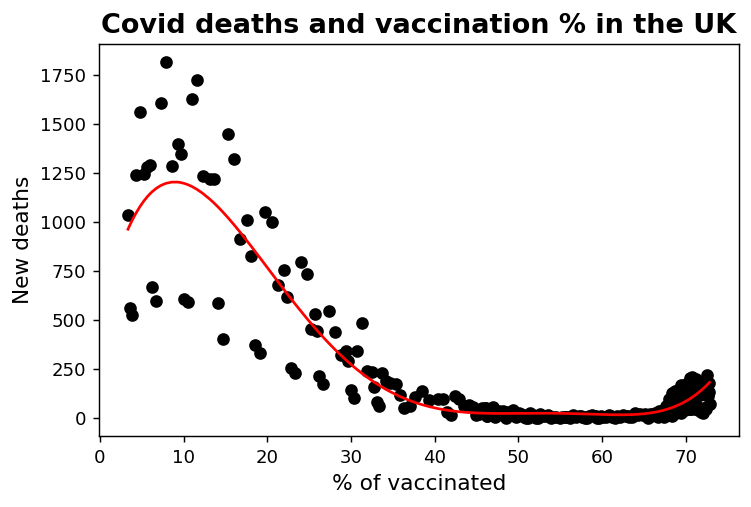

In [138]:
fig, ax = plt.subplots(1,1,figsize=(6,4), dpi= 130)
plt.scatter(uk_data.ratio , uk_data.new_deaths, color='black')
plt.plot(uk_data.ratio, lin_reg_2.predict(poly_reg.fit_transform(X)), color='red')
ax.set_title('Covid deaths and vaccination % in the UK', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('New deaths', fontsize=12)
ax.set_xlabel('% of vaccinated', fontsize=12)

fig.tight_layout()
plt.show()